### Step 1: Import Required Libraries

We begin by importing the core Python libraries needed for data handling, visualization, and model building.

In [42]:
# Basic libraries for data and charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Titanic Dataset

The dataset is loaded using pandas. We will explore the structure and initial statistics of the data.

In [43]:
# Load the dataset
df = pd.read_csv('G:\\PythonProjects\\CODSOFT\\Task 1 - Titanic Survival Prediction\\Data\\Titanic-Dataset.csv')

### Step 3: Explore the Dataset

Check the shape, data types, and initial values to understand the dataset structure.

In [44]:
# Show shape and structure
print("\n", "shape of dataset: ",df.shape)
print("\n")
df.info()


 shape of dataset:  (891, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
# Quick look at first rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 4: Handle Missing Values

We visualize and fix missing data:
- Fill missing `Age` values with the median
- Drop the `Cabin` column
- Fill `Embarked` with the mode

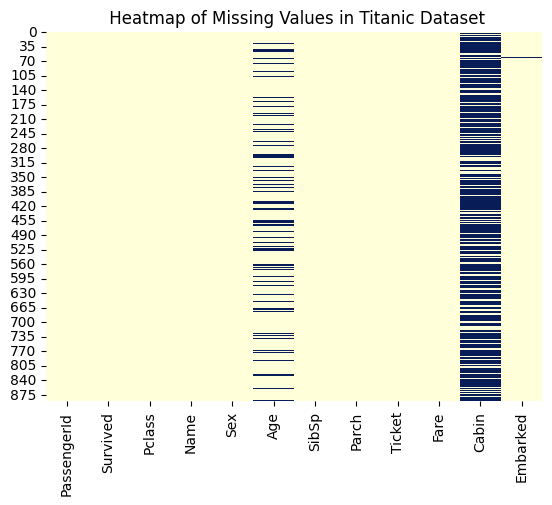

In [49]:
# missing value visiuals
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False)
plt.title(" Heatmap of Missing Values in Titanic Dataset")
plt.show()

The heatmap above shows the missing values in the Titanic dataset.

- **Yellow/white blocks** represent missing values  
- **Dark-colored blocks** represent available data  
- We observe that:
  - The `Cabin` column has many missing values
  - Some missing values are present in `Age`
  - A very few values are missing in `Embarked`

This visualization helps decide which columns to clean, fill, or drop before modeling.


In [50]:
# Fill missing `Age` values with the median.
df['Age'] = df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
# Drop the `Cabin` column
df.drop(['Cabin'], axis=1, inplace=True)

In [52]:
# Fill missing `Age` values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [53]:
# Fill `Embarked` with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [54]:
# Now we can see the required changes on the dataframe after filling missing values and dropping the column.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Step 5: Encode Categorical Columns

Convert `Sex` to numerical (0 for male, 1 for female)  
Apply one-hot encoding on `Embarked`.

In [55]:
# Convert `Sex` to numerical (0 for male, 1 for female)  
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [56]:
# Apply one-hot encoding on `Embarked`.
embark_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', dtype=int)
embark_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [57]:
# drop the 'Embarked' column which is not required further
df.drop('Embarked', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


Embarked column have droped here

### Step 6: Prepare Features and Labels

Drop unnecessary columns and separate features (X) from target (Y).

In [70]:
# Drop unnecessary columns and separate features (X) from target (Y).
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
Y = df['Survived']
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

Now dataset is cleaned and ready for ML modling

### Step 7: Split the Dataset

Split the dataset into training and testing sets.

In [59]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

### Step 8: Train the Logistic Regression Model

We use the `LogisticRegression` model to train on the training set.

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(max_iter=1000)

### Step 9: Check Model Accuracy

Calculate model accuracy on both training and test datasets.

In [75]:
train_acc = model.score(X_train, Y_train)
test_acc = model.score(X_test, Y_test)

print("Training Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy:", round(test_acc * 100, 2), "%")

Training Accuracy: 80.9 %
Test Accuracy: 77.09 %


### Step 10: Classification Report

View precision, recall, F1-score for both survived and not-survived classes.

In [ ]:
from sklearn.metrics import classification_report

In [77]:
predictions = model.predict(X_test)

print("Classification Report:")
print(classification_report(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.64      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



### Step 11: ROC Curve and AUC Score

Visualize the ROC curve and calculate AUC score for model performance.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get predicted probabilities (for class 1)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate AUC
auc = roc_auc_score(Y_test, y_prob)
print(f"ROC AUC Score: {auc:.2f}")

ROC AUC Score: 0.81


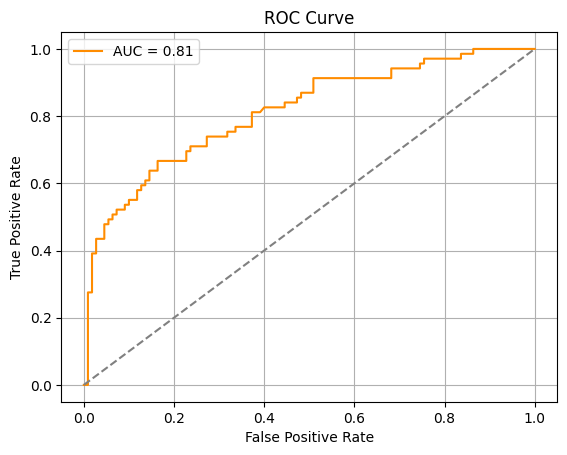

In [78]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

### Step 12: Feature Importance from Logistic Regression

Print out the coefficient weights to interpret what influences predictions.

In [ ]:
# Check feature importance from logistic regression
features = X.columns
coefficients = model.coef_[0]  # Get weights from the trained model

In [79]:
print("Feature Importance:")
for feat, coef in zip(features, coefficients):
    direction = "increases" if coef > 0 else "decreases"
    print(f"- {feat}: {direction} chance of survival (coef = {coef:.4f})")

Feature Importance:
- Pclass: decreases chance of survival (coef = -1.0364)
- Sex: increases chance of survival (coef = 2.8642)
- Age: decreases chance of survival (coef = -0.0445)
- SibSp: decreases chance of survival (coef = -0.4294)
- Parch: increases chance of survival (coef = 0.0173)
- Fare: increases chance of survival (coef = 0.0021)


### Step 13: Confusion Matrix and Final Accuracy

Plot confusion matrix and print the final model accuracy score.

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [80]:
predictions = model.predict(X_test)

In [83]:
cm = confusion_matrix(Y_test, predictions)

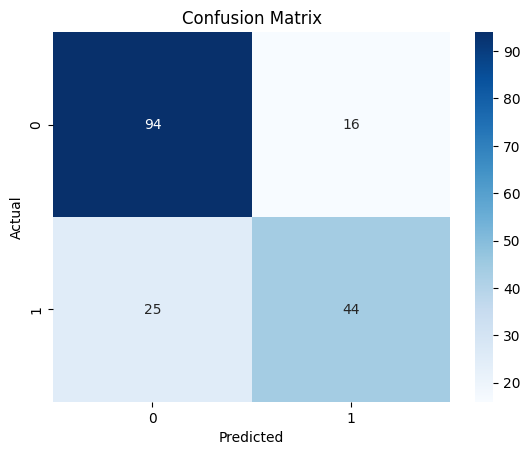

In [84]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()